<a href="https://colab.research.google.com/github/anmolrpant/Image-Classififcation-with-Tensorflow---MNSIT/blob/main/Image_Classification_with_Tensorflow_MNSIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries in Python**

In [62]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

###**Importing Tensorflow MNIST dataset**

In [63]:
mnist = tf.keras.datasets.mnist

###**Loading images**

In [65]:
(images_train,labels_train),(images_test,labels_test)=mnist.load_data()

####**Normalization of data**

In [69]:
images_train,images_test = images_train/255.0, images_test/255.0

###**Text for each lables**

In [70]:
im_textlabel = []
for i in range(10):
  im_textlabel.append(str(i))

###**Size of images**

In [71]:
im_sz = images_train.shape[1]

###**Reshaping the data to be used in the input model**

In [72]:
images_train = images_train.reshape(images_train.shape[0],im_sz,im_sz,1)
images_test = images_test.reshape(images_test.shape[0],im_sz,im_sz,1)

###**Visualizing the training data**

Label:  2


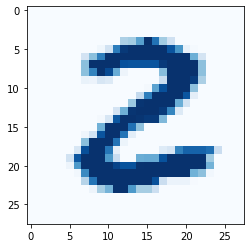

In [73]:
# Taking a look at some of the data
labels_train[11]

# Specifying the index for which we will show the image and label
image_id = 25

# Extracting the specific image
im = images_train[image_id].reshape(im_sz,im_sz)

# Plotting the selected label and the corresponding image
print('Label: ',im_textlabel[labels_train[image_id]])
plt.imshow(im,cmap='Blues')
plt.show()


##**Training the Convolutional Neural Network (CNN) Model**

In [74]:
#Specifying the model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(im_sz,im_sz,1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(16,activation="relu"),
        tf.keras.layers.Dense(10)
])

#Specifying a loss function and compiling the model with optimzation criteria
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam",loss=loss_fn,metrics= ["accuracy"])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
flatten_5 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                61968     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 66,938
Trainable params: 66,938
Non-trainable params: 0
__________________________________________________

###**Fitting the model**

In [77]:
model.fit(images_train,labels_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3713 - accuracy: 0.8901
Epoch 2/2
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2837 - accuracy: 0.9184


###**Evaluating the model**

In [78]:
#Evaluating the model
model.evaluate(images_test,labels_test,verbose=2)

313/313 - 2s - loss: 0.2360 - accuracy: 0.9307


[0.23601965606212616, 0.9307000041007996]

##**Predicting the Model**

tf.Tensor(
[-0.80304164 -4.1568356  11.126629    5.139178   -7.175124   -1.0721608
  1.2052797  -2.9855804   2.0271382  -3.877343  ], shape=(10,), dtype=float32)


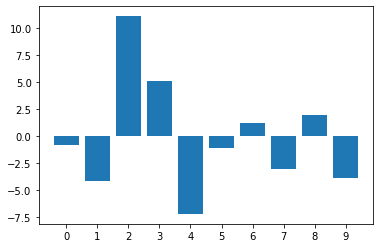


Correct Label:  2

Label Predicted:  2


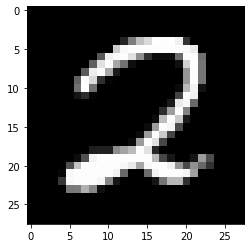

In [90]:
# Specifying the image for which we will get the prediction
image_id = 35

# Extracting the specific image
im = images_test[image_id].reshape(1,im_sz,im_sz,1)

# Obtaining the prediction
pred = model(im)
pred = pred[0]

# Plotting the results of the prediction
print(pred)
plt.bar(range(len(pred)),pred)
plt.xticks(range(len(pred)))
plt.show()

# Plotting the selected label and the corresponding image
print('\nCorrect Label: ',im_textlabel[labels_test[image_id]])
print('\nLabel Predicted: ',im_textlabel[np.argmax(pred)])
plt.imshow(im.reshape(im_sz,im_sz),cmap='gray')
plt.show()
